# Описание проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# 1. Подготовка данных

### План подготовки данных

1.1. Откройте файлы и изучите их.
Путь к файлам:

/datasets/gold_recovery_train.csv.
/datasets/gold_recovery_test.csv.
/datasets/gold_recovery_full.csv.

1.2. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

1.3. Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

1.4. Проведите предобработку данных.

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from numpy.random import RandomState
from scipy import stats as st
from sklearn.model_selection import cross_val_score

###### 1.1 Откройте файлы и изучите их.

In [101]:
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [102]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

In [103]:
full.isna().sum().sort_values(ascending=False)

rougher.output.recovery                     3119
rougher.output.tail_ag                      2737
rougher.output.tail_sol                     2736
rougher.output.tail_au                      2736
rougher.input.floatbank11_xanthate          2257
                                            ... 
primary_cleaner.state.floatbank8_b_level      43
primary_cleaner.state.floatbank8_c_level      43
primary_cleaner.state.floatbank8_d_level      43
primary_cleaner.input.feed_size                0
date                                           0
Length: 87, dtype: int64

Обучающая выборка содержит 87 столбцов и 22716строк. В данных есть пропуски. Самое большое количество пропусков в столбце со значениями эффективности обогащения чернового концентрата. Пропуски можно объяснить тем, что данные  будут измерены позже.

In [104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [105]:
train.isna().sum().sort_values(ascending=False)

rougher.output.recovery                               2573
rougher.output.tail_ag                                2250
rougher.output.tail_sol                               2249
rougher.output.tail_au                                2249
secondary_cleaner.output.tail_sol                     1986
                                                      ... 
rougher.calculation.sulfate_to_au_concentrate           27
rougher.calculation.floatbank10_sulfate_to_au_feed      27
rougher.calculation.floatbank11_sulfate_to_au_feed      27
primary_cleaner.input.feed_size                          0
date                                                     0
Length: 87, dtype: int64

In [106]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [107]:
test.isna().sum().sort_values(ascending=False)

rougher.input.floatbank11_xanthate            353
primary_cleaner.input.sulfate                 302
primary_cleaner.input.depressant              284
rougher.input.floatbank10_sulfate             257
primary_cleaner.input.xanthate                166
rougher.input.floatbank10_xanthate            123
rougher.input.feed_sol                         67
rougher.input.floatbank11_sulfate              55
rougher.input.feed_rate                        40
secondary_cleaner.state.floatbank3_a_air       34
secondary_cleaner.state.floatbank2_b_air       23
rougher.input.feed_size                        22
secondary_cleaner.state.floatbank2_a_air       20
rougher.state.floatbank10_e_air                17
rougher.state.floatbank10_d_air                17
rougher.state.floatbank10_a_air                17
rougher.state.floatbank10_b_air                17
rougher.state.floatbank10_c_air                17
rougher.state.floatbank10_f_air                17
primary_cleaner.state.floatbank8_a_air         16


Тестовая выборка содержит 53 колонки и 5856 строк. Сравнивая с обучающей выборкой, в тестовой отсутсвуют 34 признака.

###### 1.2. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [108]:
#найдем какие именно признаки отсутствуют в тестовой выборке
import collections
step = collections.Counter()
type_step = collections.Counter()
data = collections.Counter()
list_columns = [i for i in train.columns if i not in test.columns]
for i in list_columns:
    words = list(map(str,i.split(".")))
    step[words[0]] += 1
    type_step[words[1]] += 1
    data[words[2]] += 1

display(list_columns)

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

30 признаков - параметры продукта, 4 признака - расчетные характеристики

<div style="background: #cceeaa; padding: 5px; border: 1px solid green; border-radius: 5px;">
<font color='green'> 
<u>КОММЕНТАРИЙ РЕВЬЮЕРА</u>
<font color='green'><br>
В общем, да, 
В тестовой выборке недоступны некоторые расчетные (calculation) и выходные (output) характеристики процесса, т.к. их невозможно получить/измерить во время выполнения технологического процесса. 
</font>

###### Проверим правильность расчета эффективности обогащения

In [109]:
recovery = train
recovery = recovery.dropna().reset_index(drop=True)
rougher_output_recovery = recovery['rougher.output.recovery']
rougher_output_tail_au=recovery['rougher.output.tail_au']
rougher_input_feed_au=recovery['rougher.input.feed_au']
rougher_output_concentrate_au=recovery['rougher.output.concentrate_au']
# Функция Эффективность обогащения
def calc_rougher_output_recovery(rougher_output_concentrate,rougher_input_feed,rougher_output_tail):
    calc_rougher_output_recovery=((rougher_output_concentrate_au*(rougher_input_feed_au-rougher_output_tail_au))/(rougher_input_feed_au*(rougher_output_concentrate_au-rougher_output_tail_au)))*100
    return calc_rougher_output_recovery

In [110]:
calc_rougher_output_recovery(rougher_output_concentrate_au,rougher_input_feed_au,rougher_output_tail_au)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
11012    89.574376
11013    87.724007
11014    88.890579
11015    89.858126
11016    89.514960
Length: 11017, dtype: float64

In [111]:
print(rougher_output_recovery)

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
11012    89.574376
11013    87.724007
11014    88.890579
11015    89.858126
11016    89.514960
Name: rougher.output.recovery, Length: 11017, dtype: float64


In [112]:
#Посчитаем MAE для проверки рассчетного значения rougher_output_recovery  и табличного
mean_absolute_error(calc_rougher_output_recovery(rougher_output_concentrate_au,rougher_input_feed_au,rougher_output_tail_au),rougher_output_recovery)

9.555596961987514e-15

МАЕ много меньше 1, значенния расчитаны правильно.

In [113]:
#заполним пропуски в данных
#Так как данные индексируются датой и временем получения информации (признак date)и соседние по времени параметры часто похожи, поэтому заполняем последним действительным значением вперед
full=full.fillna(method='ffill')
train=train.fillna(method='ffill')
test=test.fillna(method='ffill')
#Проверим
print('Number of nans in full  \n',full.isna().sum())
print('  ')
print('Number of nans in train \n', train.isna().sum())
print('  ')
print('Number of nans in test \n', test.isna().sum())


Number of nans in full  
 date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64
  
Number of nans in train 
 date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondar

# 2. Анализ данных

###### План анализа данных

2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.

###### 2.1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

In [114]:
#создадим датафрейм с данным концентрации металлов на первом этапе очистки
concentrates_primary=[]
concentrates_primary=pd.DataFrame(concentrates_primary)
concentrates_primary['primary_cleaner.output.concentrate_au'] = full['primary_cleaner.output.concentrate_au']
concentrates_primary['primary_cleaner.output.concentrate_ag'] = full['primary_cleaner.output.concentrate_ag']
concentrates_primary['primary_cleaner.output.concentrate_pb '] = full['primary_cleaner.output.concentrate_pb']
display(concentrates_primary.head())

,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb
0,34.174427,8.547551,10.389648
1,34.118526,8.558743,10.497069
2,33.969464,8.603505,10.354494
3,28.260743,7.221879,8.496563
4,33.044932,9.089428,9.986786


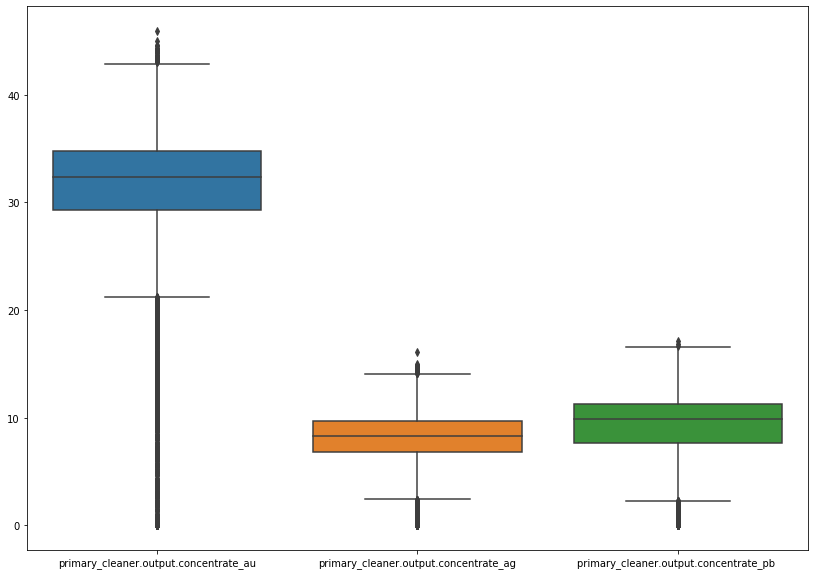

In [115]:
#boxplot  концентрации металлов 
plt.figure(figsize=(14,10))
ax = sns.boxplot(data=concentrates_primary)

По полученному "ящику с усами" видим, что наибольшее количесво выбросов в концентрации золота при первичной обработке. Выбросы серебра и свинца несильно отличаются, но у серебра их меньше.

In [116]:
#создадим датафрейм с данным концентрации металлов во время флотации
concentrates_rougher=[]
concentrates_rougher=pd.DataFrame(concentrates_rougher)
concentrates_rougher['rougher.output.concentrate_au'] = full['rougher.output.concentrate_au']
concentrates_rougher['rougher.output.concentrate_ag'] = full['rougher.output.concentrate_ag']
concentrates_rougher['rougher.output.concentrate_pb'] = full['rougher.output.concentrate_pb']
display(concentrates_rougher.head())

,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb
0,19.793808,11.500771,7.101074
1,20.050975,11.615865,7.278807
2,19.737170,11.695753,7.216833
3,19.320810,11.915047,7.175616
4,19.216101,12.411054,7.240205


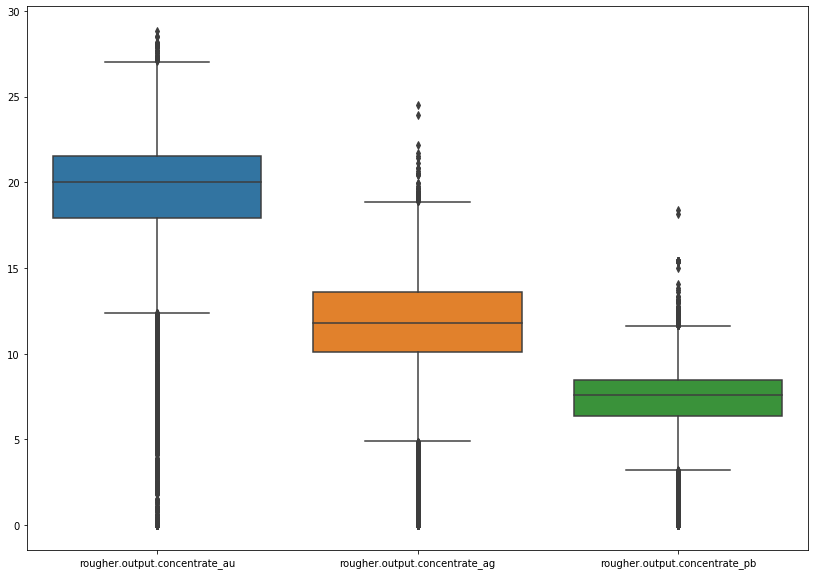

In [117]:
#boxplot  концентрации металлов 
plt.figure(figsize=(14,10))
ax = sns.boxplot(data=concentrates_rougher)

Аналогичная ситуация и на этом этапе очистки. Выбросов у серебра стало больше, чем у свинца.

In [118]:
#создадим датафрейм с данным концентрации металлов во время финальной очистки
concentrates_final=[]
concentrates_final=pd.DataFrame(concentrates_final)
concentrates_final['final.output.concentrate_au'] = full['final.output.concentrate_au']
concentrates_final['final.output.concentrate_ag'] = full['final.output.concentrate_ag']
concentrates_final['final.output.concentrate_pb'] = full['final.output.concentrate_pb']
display(concentrates_final.head())

,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb
0,42.192020,6.055403,9.889648
1,42.701629,6.029369,9.968944
2,42.657501,6.055926,10.213995
3,42.689819,6.047977,9.977019
4,42.774141,6.148599,10.142511


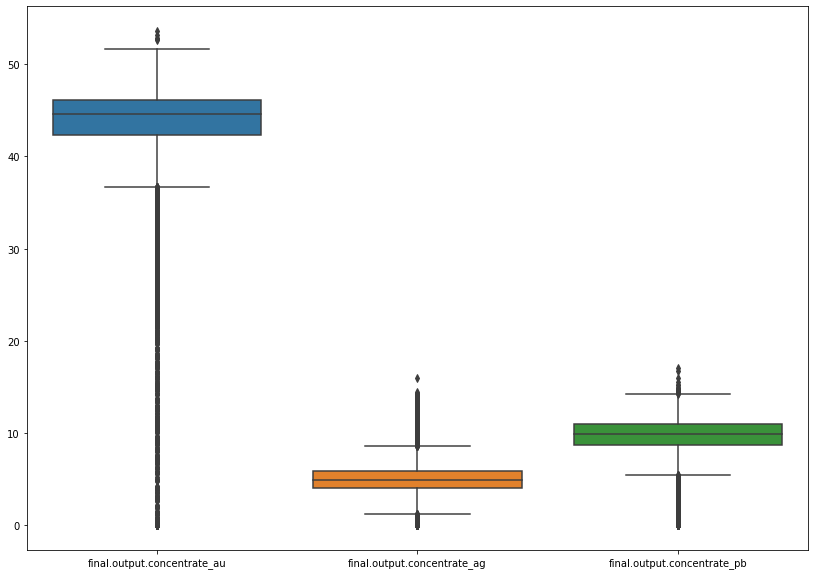

In [119]:
#boxplot  концентрации металлов 
plt.figure(figsize=(14,10))
ax = sns.boxplot(data=concentrates_final)

На финальном этапе очистки выбросов в концентрации золота также много. Выбросы у серебра и свинца слабо отличаются.

###### Распределение концентрации металлов на этапе первичной очистки

Text(0, 0.5, 'Frequency')

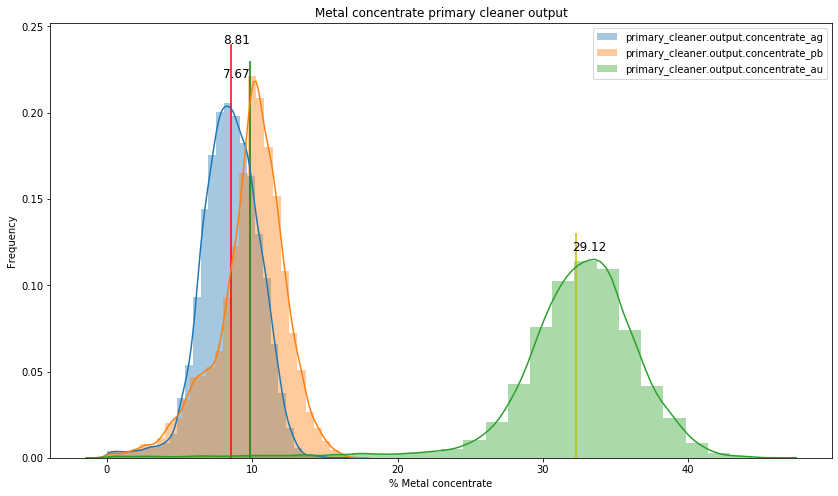

In [120]:
plt.figure(figsize=(14,8))
sns.distplot(full[full['primary_cleaner.output.concentrate_ag']>0.03]['primary_cleaner.output.concentrate_ag'],bins=30,label='primary_cleaner.output.concentrate_ag')
sns.distplot(full[full['primary_cleaner.output.concentrate_pb']>0.03]['primary_cleaner.output.concentrate_pb'],bins=30,label='primary_cleaner.output.concentrate_pb')
sns.distplot(full[full['primary_cleaner.output.concentrate_au']>0.03]['primary_cleaner.output.concentrate_au'],bins=30,label='primary_cleaner.output.concentrate_au')
plt.vlines(full[full['primary_cleaner.output.concentrate_ag']>0.3]['primary_cleaner.output.concentrate_ag'].mean(),0,0.24,color = 'r')
plt.vlines(full[full['primary_cleaner.output.concentrate_pb']>0.3]['primary_cleaner.output.concentrate_pb'].mean(),0,0.23,color = 'g')
plt.vlines(full[full['primary_cleaner.output.concentrate_au']>0.3]['primary_cleaner.output.concentrate_au'].mean(),0,0.13,color = 'y')

plt.text(8,0.22,round(full['primary_cleaner.output.concentrate_ag'].mean(),2),fontsize=12)
plt.text(8,0.24,round(full['primary_cleaner.output.concentrate_pb'].mean(),2),fontsize=12)
plt.text(32,0.12,round(full['primary_cleaner.output.concentrate_au'].mean(),2),fontsize=12)
plt.legend()
plt.title('Metal concentrate primary cleaner output')
plt.xlabel("% Metal concentrate")
plt.ylabel("Frequency")

######  Распределение концентрации металлов на этапе флотации

Text(0, 0.5, 'Frequency')

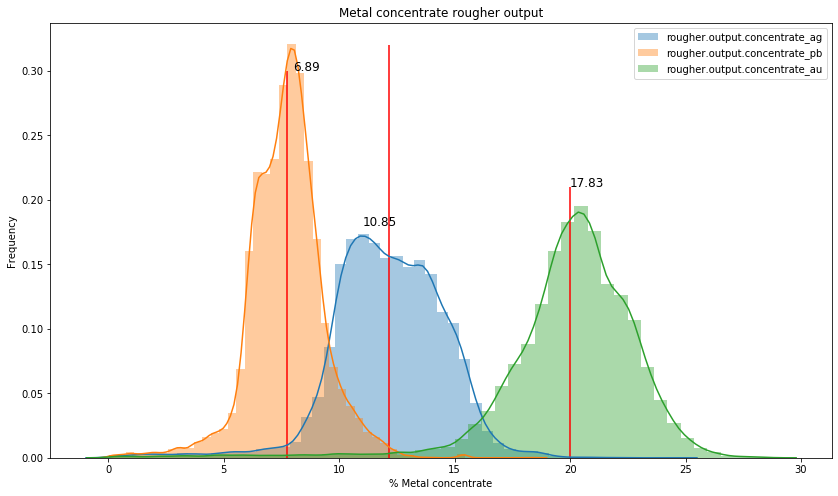

In [121]:
plt.figure(figsize=(14,8))
sns.distplot(full[full['rougher.output.concentrate_ag']>0.03]['rougher.output.concentrate_ag'],bins=50,label='rougher.output.concentrate_ag')
sns.distplot(full[full['rougher.output.concentrate_pb']>0.03]['rougher.output.concentrate_pb'],bins=50,label='rougher.output.concentrate_pb')
sns.distplot(full[full['rougher.output.concentrate_au']>0.03]['rougher.output.concentrate_au'],bins=50,label='rougher.output.concentrate_au')
plt.vlines(full[full['rougher.output.concentrate_ag']>0.3]['rougher.output.concentrate_ag'].mean(),0,0.32,color = 'r')
plt.vlines(full[full['rougher.output.concentrate_pb']>0.3]['rougher.output.concentrate_pb'].mean(),0,0.30,color = 'r')
plt.vlines(full[full['rougher.output.concentrate_au']>0.3]['rougher.output.concentrate_au'].mean(),0,0.21,color = 'r')

plt.text(11,0.18,round(full['rougher.output.concentrate_ag'].mean(),2),fontsize=12)
plt.text(8,0.30,round(full['rougher.output.concentrate_pb'].mean(),2),fontsize=12)
plt.text(20,0.21,round(full['rougher.output.concentrate_au'].mean(),2),fontsize=12)

plt.legend()
plt.title('Metal concentrate rougher output')
plt.xlabel("% Metal concentrate")
plt.ylabel("Frequency")

######  Распределение концентрации металлов на финальном этапе очистки

Text(0, 0.5, 'Frequency')

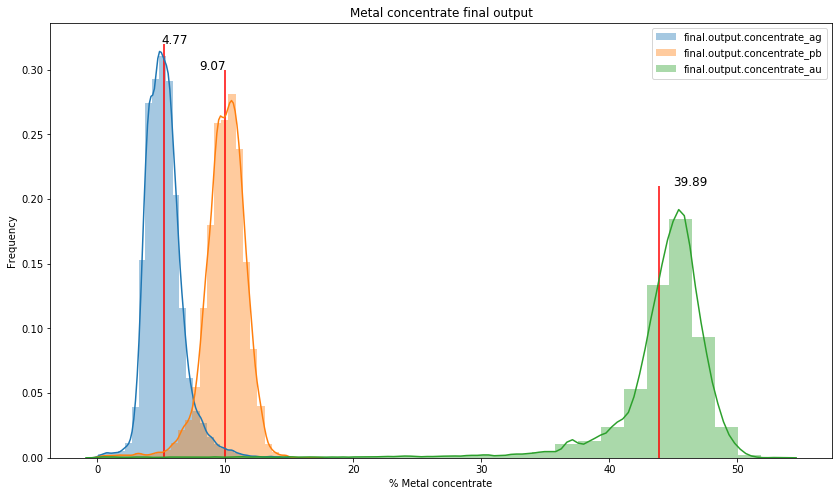

In [122]:
plt.figure(figsize=(14,8))
sns.distplot(full[full['final.output.concentrate_ag']>0.03]['final.output.concentrate_ag'],bins=30,label='final.output.concentrate_ag')
sns.distplot(full[full['final.output.concentrate_pb']>0.03]['final.output.concentrate_pb'],bins=30,label='final.output.concentrate_pb')
sns.distplot(full[full['final.output.concentrate_au']>0.03]['final.output.concentrate_au'],bins=30,label='final.output.concentrate_au')
plt.vlines(full[full['final.output.concentrate_ag']>0.3]['final.output.concentrate_ag'].mean(),0,0.32,color = 'r')
plt.vlines(full[full['final.output.concentrate_pb']>0.3]['final.output.concentrate_pb'].mean(),0,0.30,color = 'r')
plt.vlines(full[full['final.output.concentrate_au']>0.3]['final.output.concentrate_au'].mean(),0,0.21,color = 'r')

plt.text(5,0.32,round(full['final.output.concentrate_ag'].mean(),2),fontsize=12)
plt.text(8,0.30,round(full['final.output.concentrate_pb'].mean(),2),fontsize=12)
plt.text(45,0.21,round(full['final.output.concentrate_au'].mean(),2),fontsize=12)

plt.legend()
plt.title('Metal concentrate final output')
plt.xlabel("% Metal concentrate")
plt.ylabel("Frequency")

###### Вывод 
Концентрация металлов менялась на всех этапах очистки. После первичной очистки средняя концентрация золота составила 29.12%. После флотации среднее значение концентрации золота увеличилось почти в 3 раза. А после финальной очистки средняя концентрация золота составила почти 40%. После каждого этапа очистки распределение концентрации металлов стало более концентрированным вокруг среднего значения.

###### 2.2. Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

Text(0, 0.5, 'Frequency')

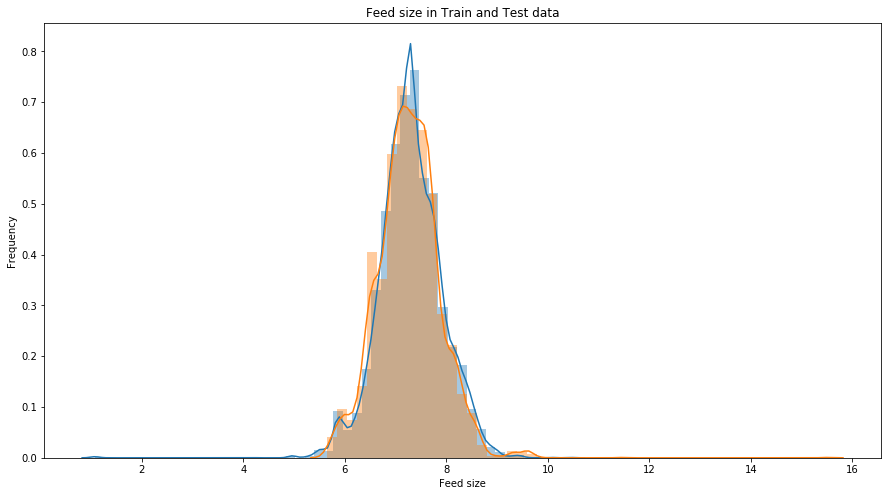

In [123]:
plt.figure(figsize=(15,8))
sns.distplot(train['primary_cleaner.input.feed_size'],label='train primary_cleaner.input.feed_size')
sns.distplot(test['primary_cleaner.input.feed_size'],label='test primary_cleaner.input.feed_size')
plt.title('Feed size in Train and Test data')
plt.legend
plt.xlabel('Feed size')
plt.ylabel('Frequency')

Видим, что на обучающей и на тестовой выборке распределение размеров гранул почти совпадает. Можем считать тестовую выборку репрезентативной.

###### 2.3. Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Заметили аномальные значения в суммарном распределении или нет? Если они есть, стоит ли их удалять из обеих выборок? Опишите выводы и удалите аномалии.



In [124]:
#посчитаем сумму концентрации веществ после первичной очистки
full['sum_primary_cleaner_concentrate'] = full['primary_cleaner.output.concentrate_ag']+full['primary_cleaner.output.concentrate_pb']+full['primary_cleaner.output.concentrate_sol']+full['primary_cleaner.output.concentrate_au']

In [125]:
#посчитаем сумму концентрации веществ после флотации
full['sum_rougher_concentrate'] = full['rougher.output.concentrate_ag']+full['rougher.output.concentrate_pb']+full['rougher.output.concentrate_sol']+full['rougher.output.concentrate_au']

In [126]:
#посчитаем сумму концентрации веществ после финальной очистки
full['sum_final_concentrate'] = full['final.output.concentrate_ag']+full['final.output.concentrate_pb']+full['final.output.concentrate_sol']+full['final.output.concentrate_au']

Text(0, 0.5, 'Frequency')

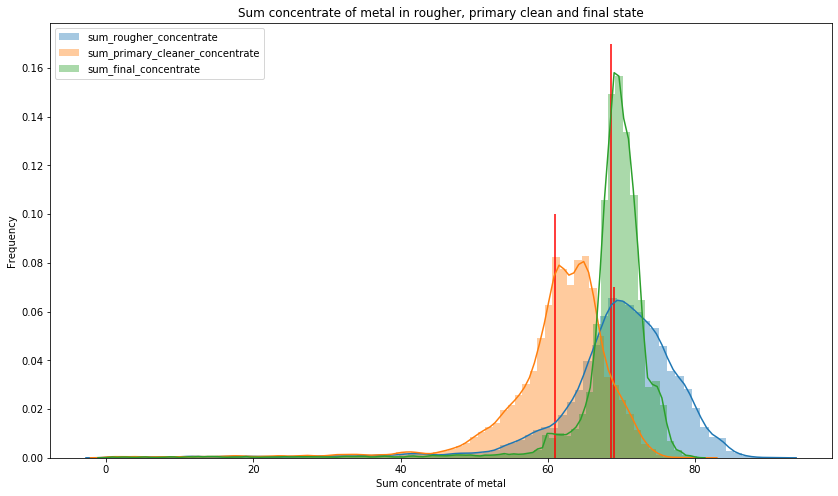

In [127]:
plt.figure(figsize=(14,8))
sns.distplot(full[full['sum_rougher_concentrate']>0.04]['sum_rougher_concentrate'],bins=80,label='sum_rougher_concentrate')
sns.distplot(full[full['sum_primary_cleaner_concentrate']>0.04]['sum_primary_cleaner_concentrate'],bins=80,label='sum_primary_cleaner_concentrate')
sns.distplot(full[full['sum_final_concentrate']>0.04]['sum_final_concentrate'],bins=80,label='sum_final_concentrate')
plt.vlines(full[full['sum_rougher_concentrate']>0.3]['sum_rougher_concentrate'].mean(),0,0.07,color = 'r')
plt.vlines(full[full['sum_primary_cleaner_concentrate']>0.3]['sum_primary_cleaner_concentrate'].mean(),0,0.10,color = 'r')
plt.vlines(full[full['sum_final_concentrate']>0.3]['sum_final_concentrate'].mean(),0,0.17,color = 'r')
plt.legend()
plt.title('Sum concentrate of metal in rougher, primary clean and final state')
plt.xlabel("Sum concentrate of metal")
plt.ylabel("Frequency")

Из приведенного графика, видим большое количество выбросов 0-40. От них можно избавиться. 

In [128]:
full=full[full['sum_final_concentrate']>40]
full=full[full['sum_primary_cleaner_concentrate']>40]
full=full[full['sum_rougher_concentrate']>40]
full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,sum_primary_cleaner_concentrate,sum_rougher_concentrate,sum_final_concentrate
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,72.640924,66.424950,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,72.543485,67.012710,63.957723
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,72.095042,66.103793,64.311180
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,59.957723,65.752751,63.573449
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,71.321010,65.908382,64.004667


Text(0, 0.5, 'Frequency')

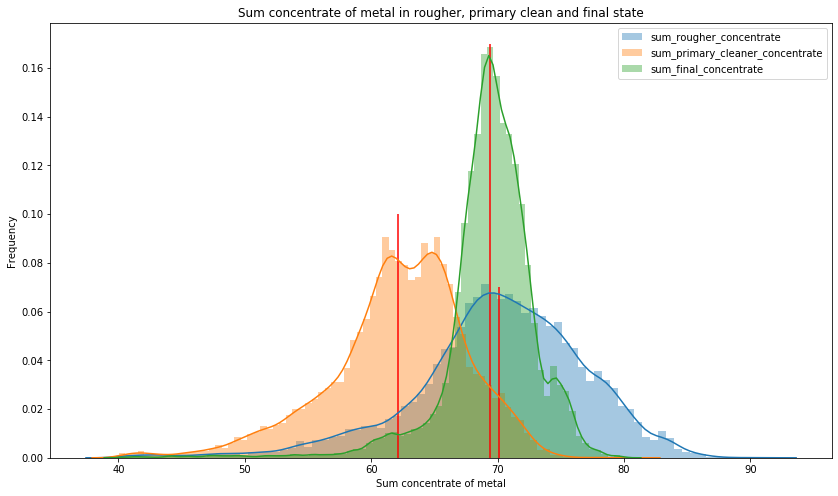

In [129]:
plt.figure(figsize=(14,8))
sns.distplot(full['sum_rougher_concentrate'],bins=80,label='sum_rougher_concentrate')
sns.distplot(full['sum_primary_cleaner_concentrate'],bins=80,label='sum_primary_cleaner_concentrate')
sns.distplot(full['sum_final_concentrate'],bins=80,label='sum_final_concentrate')
plt.vlines(full['sum_rougher_concentrate'].mean(),0,0.07,color = 'r')
plt.vlines(full['sum_primary_cleaner_concentrate'].mean(),0,0.10,color = 'r')
plt.vlines(full['sum_final_concentrate'].mean(),0,0.17,color = 'r')
plt.legend()
plt.title('Sum concentrate of metal in rougher, primary clean and final state')
plt.xlabel("Sum concentrate of metal")
plt.ylabel("Frequency")

Теперь все красиво :) Поступим аналогичным образом с обучающей выборкой.

In [130]:
#посчитаем сумму концентрации веществ после первичной очистки
train['sum_primary_cleaner_concentrate'] = train['primary_cleaner.output.concentrate_ag']+train['primary_cleaner.output.concentrate_pb']+train['primary_cleaner.output.concentrate_sol']+train['primary_cleaner.output.concentrate_au']

In [131]:
#посчитаем сумму концентрации веществ после флотации
train['sum_rougher_concentrate'] = train['rougher.output.concentrate_ag']+train['rougher.output.concentrate_pb']+train['rougher.output.concentrate_sol']+train['rougher.output.concentrate_au']

In [132]:
#посчитаем сумму концентрации веществ после финальной очистки
train['sum_final_concentrate'] = train['final.output.concentrate_ag']+train['final.output.concentrate_pb']+train['final.output.concentrate_sol']+train['final.output.concentrate_au']

Text(0, 0.5, 'Frequency')

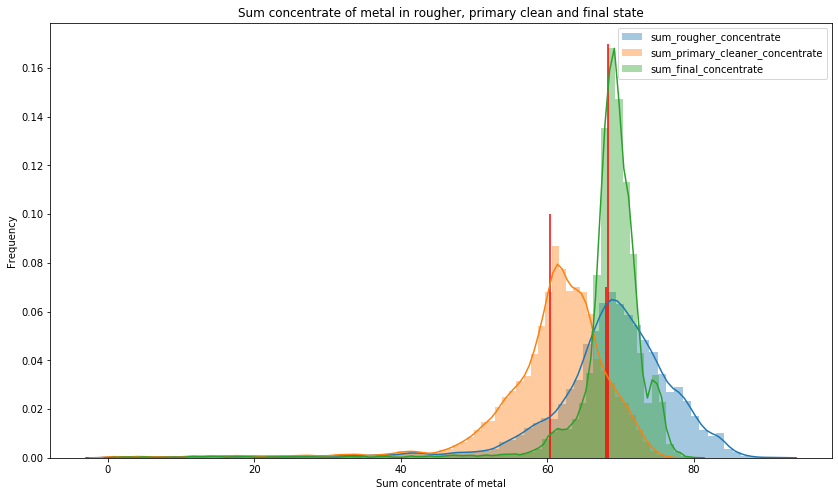

In [133]:
plt.figure(figsize=(14,8))
sns.distplot(train[train['sum_rougher_concentrate']>0.04]['sum_rougher_concentrate'],bins=80,label='sum_rougher_concentrate')
sns.distplot(train[train['sum_primary_cleaner_concentrate']>0.04]['sum_primary_cleaner_concentrate'],bins=80,label='sum_primary_cleaner_concentrate')
sns.distplot(train[train['sum_final_concentrate']>0.04]['sum_final_concentrate'],bins=80,label='sum_final_concentrate')
plt.vlines(train[train['sum_rougher_concentrate']>0.3]['sum_rougher_concentrate'].mean(),0,0.07,color = 'r')
plt.vlines(train[train['sum_primary_cleaner_concentrate']>0.3]['sum_primary_cleaner_concentrate'].mean(),0,0.10,color = 'r')
plt.vlines(train[train['sum_final_concentrate']>0.3]['sum_final_concentrate'].mean(),0,0.17,color = 'r')
plt.legend()
plt.title('Sum concentrate of metal in rougher, primary clean and final state')
plt.xlabel("Sum concentrate of metal")
plt.ylabel("Frequency")

Видим, что и в обучающей выборке выбросы от 0-40. Также избавимся от них.

In [134]:
train=train[train['sum_final_concentrate']>40]
train=train[train['sum_primary_cleaner_concentrate']>40]
train=train[train['sum_rougher_concentrate']>40]
train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,sum_primary_cleaner_concentrate,sum_rougher_concentrate,sum_final_concentrate
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,72.640924,66.424950,63.644396
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,72.543485,67.012710,63.957723
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,72.095042,66.103793,64.311180
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,59.957723,65.752751,63.573449
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,71.321010,65.908382,64.004667


Text(0, 0.5, 'Frequency')

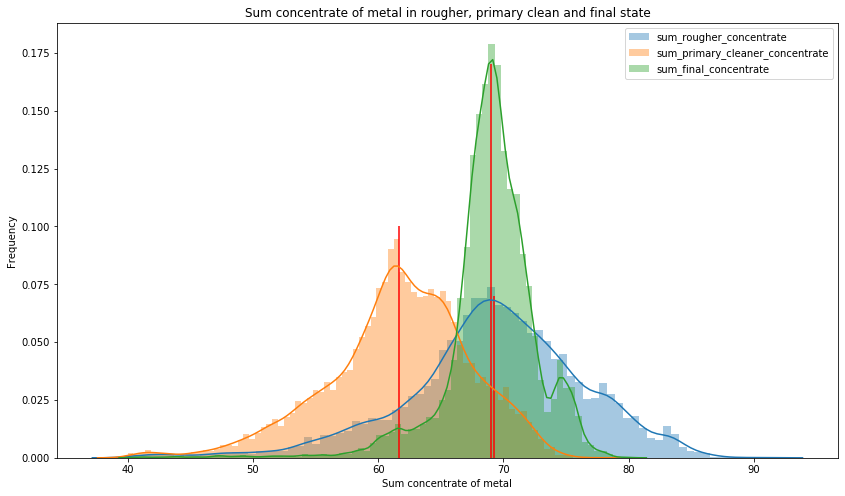

In [135]:
plt.figure(figsize=(14,8))
sns.distplot(train['sum_rougher_concentrate'],bins=80,label='sum_rougher_concentrate')
sns.distplot(train['sum_primary_cleaner_concentrate'],bins=80,label='sum_primary_cleaner_concentrate')
sns.distplot(train['sum_final_concentrate'],bins=80,label='sum_final_concentrate')
plt.vlines(train['sum_rougher_concentrate'].mean(),0,0.07,color = 'r')
plt.vlines(train['sum_primary_cleaner_concentrate'].mean(),0,0.10,color = 'r')
plt.vlines(train['sum_final_concentrate'].mean(),0,0.17,color = 'r')
plt.legend()
plt.title('Sum concentrate of metal in rougher, primary clean and final state')
plt.xlabel("Sum concentrate of metal")
plt.ylabel("Frequency")

# 3. Модель

In [136]:
#функция sMAPE
def sMAPE(predict,target):
    #predict_rougher=predict[:,0]
    #target__rougher=target[:,0]
    #predict_final=predict[:,1]
    #target__final=target[:,1]
    
    sMAPE=np.sum(abs(target-predict)/((abs(target)+abs(predict))/2))
    

    sMAPE=sMAPE / len(target)*100
    
   
    #sMAPE_final=np.sum(abs(target__final-predict_final)/((abs(target__final)+abs(predict_final))/2))
    #sMAPE_final=sMAPE_final/len(target__final)*100
    
    #sMAP=
    #return sMAP
    return sMAPE

In [137]:
#обучим модель на обучающей выборке с колонками, которые есть в тестовой выборке 
columns=test.columns 

In [138]:
feature=train[columns] # Формируем признаки Выбираем из trian только те колонки, которые есть в test
feature=feature.drop(['date'],axis=1)
target_rougher = train['rougher.output.recovery']
target_final = train['final.output.recovery']

In [139]:
#построим и обучим модели
#Случайный лес
model_RF = RandomForestRegressor(n_estimators=5, max_depth=3, random_state=12345)
model_RF_rougher = model_RF.fit(feature, target_rougher) #модель для чернового концентрата
model_RF_final = model_RF.fit(feature, target_final) #модель финального концентрата

#Линейная регрессия
model_LR = LinearRegression()
model_LR_rougher = model_LR.fit(feature, target_rougher) #модель для чернового концентрата
model_LR_final = model_LR.fit(feature, target_final) #модель финального концентрата



In [140]:
#Проверим качество моделей кросс-валидацией
#Кросс-валидация для случайного леса
final_score = cross_val_score(model_RF, feature, target_rougher, cv=5).sum() / len(cross_val_score(model_RF, feature, target_rougher, cv=5))
print('Средняя оценка качества модели чернового концентрата:', final_score)
final_score = cross_val_score(model_RF, feature, target_final, cv=5).sum() / len(cross_val_score(model_RF, feature, target_final, cv=5))
print('Средняя оценка качества модели финального концентрата:', final_score)

Средняя оценка качества модели чернового концентрата: -0.43638168786952514
Средняя оценка качества модели финального концентрата: 0.09433327114192931


In [141]:
#Кросс-валидация для линейной регрессии
final_score = cross_val_score(model_LR, feature, target_rougher, cv=5).sum() / len(cross_val_score(model_LR, feature, target_rougher, cv=5))
print('Средняя оценка качества модели чернового концентрата:', final_score)
final_score = cross_val_score(model_LR, feature, target_final, cv=5).sum() / len(cross_val_score(model_LR, feature, target_final, cv=5))
print('Средняя оценка качества модели финального концентрата:', final_score)

Средняя оценка качества модели чернового концентрата: -0.438078661678461
Средняя оценка качества модели финального концентрата: -0.1960932203698292


Видим, что кросс-валидация показала, что среднии оценки модели чернового концентрата примерно одинаковые, а для финального есть значительные различия. Средняя оценка качества модели случайного леса финального концентрата 0.09, а для линейной регрессии -0.19. 
       

#### Предсказания на тестовом наборе данных

In [142]:
target = full[['date','rougher.output.recovery','final.output.recovery']]
test=test.merge(target, on='date',how='left')
test=test.dropna()

In [143]:
feature_test=test.drop(columns=['date','rougher.output.recovery','final.output.recovery'])
target_test=test[['rougher.output.recovery','final.output.recovery']]


In [144]:
#sMape для случайного леса
prediction_RF_rougher=model_RF_rougher.predict(feature_test)
prediction_RF_final=model_RF_final.predict(feature_test)
smape_rougher=sMAPE(prediction_RF_rougher,target_test['rougher.output.recovery'])
smape_final = sMAPE(prediction_RF_final,target_test['final.output.recovery'])
sMAPE_RF = 0.25*smape_rougher+0.75*smape_final
sMAPE_RF

12.623941214032502

In [145]:
#sMape для линейной регрессии
prediction_LR_rougher=model_LR_rougher.predict(feature_test)
prediction_LR_final=model_LR_final.predict(feature_test)
smape_rougher=sMAPE(prediction_LR_rougher,target_test['rougher.output.recovery'])
smape_final = sMAPE(prediction_LR_final,target_test['final.output.recovery'])
sMAPE_LR = 0.25*smape_rougher+0.75*smape_final
sMAPE_LR

11.742135984607415

Лучше всего показала себя модель линейной регрессии sMAPE = 11.74.Возможно мы бы получили более приемлемые результаты, если бы не пропуски в тестовой выборке.

In [147]:
#Создадим константную модель:
model_const = DummyRegressor(strategy="median")
model_const_rougher = model_const.fit(feature, target_rougher) #модель для чернового концентрата
model_const_final = model_const.fit(feature, target_final) #модель финального концентрата
prediction_const_rougher=model_const_rougher.predict(feature_test)
prediction_const_final=model_const_final.predict(feature_test)
smape_rougher=sMAPE(prediction_const_rougher,target_test['rougher.output.recovery'])
smape_final = sMAPE(prediction_const_final,target_test['final.output.recovery'])
sMAPE_const = 0.25*smape_rougher+0.75*smape_final
sMAPE_const

12.450557768596706

<font color='blue'>Константная модель показала результат немного лучше, чем случайный лес, но хуже чем линейная регрессия

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [ ]  Выполнен шаг 1: данные подготовлены
    - [ ]  Проверена формула вычисления эффективности обогащения
    - [ ]  Проанализированы признаки, недоступные в тестовой выборке
    - [ ]  Проведена предобработка данных
- [ ]  Выполнен шаг 2: данные проанализированы
    - [ ]  Исследовано изменение концентрации элементов на каждом этапе
    - [ ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [ ]  Исследованы суммарные концентрации
    - [ ]  Проанализированы и обработаны аномальные значения
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [ ]  Написана функция для вычисления итогового *sMAPE*
    - [ ]  Обучено и проверено несколько моделей
    - [ ]  Выбрана лучшая модель, её качество проверено на тестовой выборке